# Statistical Distributions

In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

![](images/distributions.png)

## Agenda:

SWBAT:
- 1. Describe the difference between discrete and continuous random variables;
- 2. Describe the difference between PMFs, PDFs, and CDFs;
- 3. Describe the Bernoulli and Binomial Distributions;
- 4. Describe the Normal Distribution and the associated Empirical Rule.

## What is a statistical distribution?

- A statistical distribution is a representation of the frequencies of potential events or the percentage of time each event occurs.

## Discrete vs. Continuous

We will learn about a variety of different probability distributions, but before we do so, we need to establish the difference between **discrete** and **continuous** variables.

### Discrete

>  With discrete distributions, the values can only take a finite set of values.  Take, for example, a roll of a single six-sided die. 

![](images/uniform.png)

> - There are 6 possible outcomes of the roll. As you see on the PMF plot, the bars which represent probability do not touch, suggesting non-integer numbers between 1 and 6 are not possible results.

#### Examples of discrete distributions:

- **Uniform Distribution**
    - occurs when all possible outcomes are equally likely.
- **Bernoulli Distribution**
    - represents the probability of success for a certain experiment (binary outcome).
- **Binomial Distribution**
    - represents the probability of observing a specific number of successes (Bernoulli trials) in a specific number of trials.
- **Poisson Distribution**
    - represents the probability of 𝑛 events in a given time period when the overall rate of occurrence is constant.

### Continuous

With a continuous distribution, the set of possible results is an infinite set of values within a range. Think about measuring the length of something. The reported measurement can always be more or less precise.

![](images/pdf.png)

#### Examples of continuous distributions

- **Continuous Uniform**;
- **Normal or Gaussian**;
- **Exponential**

## PMFs, PDFs, CDFs

### PMF: Probability Mass Function

The $\bf{probability\ mass\ function\ (pmf)}$ for a random variable gives, at any value $k$, the probability that the random variable takes the value $k$. Suppose, for example, that I have a jar full of lottery balls containing:
- 50 "1"s,
- 25 "2"s,
- 15 "3"s,
- 10 "4"s

We then represent this function in a plot like so:

In [2]:
# For each number, we calculate the probability that pull it from the jar by dividing

numbers = range(1, 5)
counts = [50, 25, 15, 10]

# calculate the probs by dividing each count by the total number of balls.

probs = [count/sum(counts) for count in counts]

lotto_dict = {number: prob for number, prob in zip(numbers, probs)}
lotto_dict

{1: 0.5, 2: 0.25, 3: 0.15, 4: 0.1}

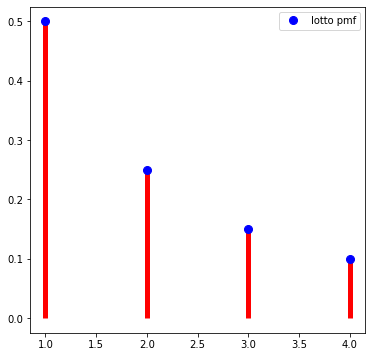

In [3]:
# Plot here!

x = list(lotto_dict.keys())
y = list(lotto_dict.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y, 'bo', ms=8, label='lotto pmf')
ax.vlines(x, 0, y, 'r', lw=5)
ax.legend(loc='best');

### Expected Value/Mean

The expected value, or the mean, describes the 'center' of the distribution (you may hear this called the first moment).  The 'center' refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

For a discrete distribution, working from the vantage point of a collected sample of n data points:

mean = $\Large\mu = \frac{\Sigma^n_{i = 1}x_i}{n}$

If we are working from the vantage point of known probabilities, the mean is referred to as the expected value. The expected value of a discrete distribution is the weighted sum of all values of x, where the weight is their probability.
 
The expected value of the Lotto example is:
${\displaystyle \operatorname {E} [X]= \Sigma^n_{i=1}p(x_i)x_i}$

### Variance/Standard Deviation

Variance describes the spread of the data (it is also referred to as the second moment).  The 'spread' refers loosely to how far away the more extreme values are from the center.

Standard deviation is the square root of variance, and effectively measures the *average distance away from the mean*.

From the standpoint of a sample, the variance of a discrete distribution of n data points is:

std = $\Large\sigma = \sqrt{\frac{\Sigma^n_{i = 1}(x_i - \mu)^2}{n}}$


Variance is the expectation of the squared deviation of a random variable from its mean.

For our Lotto PMF, that means:

 $ \Large E((X-\mu)^2) = \sigma^2 = \Sigma^n_{i=1}p(x_i)(x_i - \mu)^2$

### Uniform Distribution

The uniform distribution describes a set of discrete outcomes whose probabilities are all equally likely.

A common example is the roll of a die.  

The pmf of a discrete uniform distribution is simply:

$ f(x)=\frac{1}{n} $

In [4]:
# expected value for the roll of a 12-sided die

expected_value = sum([1/12 * n for n in range(1, 13)])
print(f'Expected value: {expected_value}')

# variance for a roll of a 12-sided die

variance = sum([1/12 * (n - expected_value)**2 for n in range(1, 13)])
print(f'Variance: {variance}')

Expected value: 6.5
Variance: 11.916666666666664


## PDF: Probability Density Function

> Probability density functions are similar to PMFs, in that they describe the probability of a result within a range of values. But where PMFs are appropriate for discrete variables and so can be descibed with barplots, PDFs are smooth curves that describe continuous random variables.  

![](images/pdf_temp.png)

We can think of a pdf as a bunch of bars of probabilities getting smaller and smaller until each neighbor is indistinguishable from its neighbor.

It is then intuitive that you cannot calculate expected value and variance in the same way as we did with pmfs.  Instead, we have to integrate over the entirety of the curve to calculate the expected value.

### Expected value and variance for PDFs:

![](images/exp_v_pdf.png)

![](images/pdf_inter.png)

### Describing the PDF

Instead of calculating the mean and standard deviation by hand, we will rather get familiar with how they affect the shape of our PDF.


The mean of our PDF affects where it is centered on the x-axis.  In `numpy` and `stats`, mean is denoted by the "loc" parameter.

The two plots below have the same shape, but different centers.

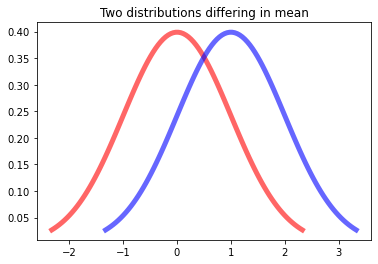

In [5]:
fig, ax = plt.subplots()

mean = 0
z_curve = np.linspace(stats.norm(mean, 1).ppf(0.01),
             stats.norm(mean, 1).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean, 1).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve')

mean = 1
z_curve = np.linspace(stats.norm(mean, 1).ppf(0.01),
             stats.norm(mean, 1).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean, 1).pdf(z_curve),
     'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing in mean");

The variance of our plots describes how closely the points are gathered around the mean.  Low variance means tight and skinny, high variance short and wide.

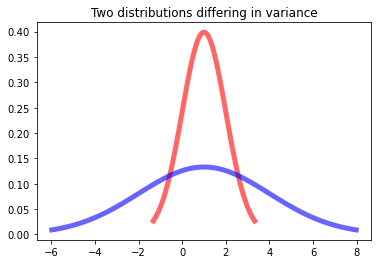

In [6]:
fig, ax = plt.subplots()

mean = 1
var = 1
z_curve = np.linspace(stats.norm(mean, var).ppf(0.01),
             stats.norm(mean, var).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean, var).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve')

mean = 1
var = 3
z_curve = np.linspace(stats.norm(mean, var).ppf(0.01),
             stats.norm(mean, var).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean, var).pdf(z_curve),
     'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing in variance");

### Skewed Distributions

Recall the third moment of a statistical distribution: skew. A skew of zero is perfectly symmetrical about the mean.   

![skew](images/skew.png)

In [7]:
# We can check skewness with scipy

z_curve = np.random.normal(0, 1, 1000)
print(stats.skew(z_curve))

-0.012608884731827419


#### Transforming  Right/Positively Skewed Data

We may want to transform our skewed data to make it approach symmetry.

Common transformations of this data include 

##### Root Transformations:

- $x \rightarrow\sqrt[n]{x}$

##### Logarithmic Transformations:

- $x \rightarrow\log_n{x}$

#### Transforming Left/Negatively Skewed Data

##### Power Transformations:

- $x\rightarrow x^n$

### Kurtosis

![kurtosis](images/kurtosis.png)

## CDF: Cumulative Distribution Function

![](images/cdf.png)

The cumulative distribution function describes the probability that your result will be of a value equal to or below a certain value. It can apply to both discrete or continuous functions.

For the scenario above, the CDF would describe the probability of drawing a ball equal to or below a certain number.  

In order to create the CDF from a sample, we:
- align the values from least to greatest
- for each value, count the number of values that are less than or equal to the current value
- divide that count by the total number of values

The CDF of the Lotto example plots how likely we are to get a ball less than or equal to a given example. 

Let's create the CDF for our Lotto example


In [8]:
# align the values

lotto_dict = {0:0, 1:50, 2:25, 3:15, 4:10}
values = list(lotto_dict.keys())

# count the number of values that are less than
# or equal to the current value

count_less_than_equal = np.cumsum(list(lotto_dict.values()))

# divide by total number of values
prob_less_than_or_equal = count_less_than_equal/sum(lotto_dict.values()) 

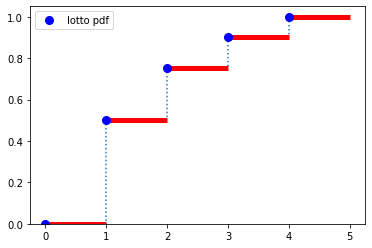

In [9]:
fig, ax = plt.subplots()
ax.plot(values, prob_less_than_or_equal, 'bo', ms=8, label='lotto pdf')
for i in range(0, 5):
    ax.hlines(prob_less_than_or_equal[i], i,i+1, 'r', lw=5,)
for i in range(0, 4):
    ax.vlines(i+1, prob_less_than_or_equal[i+1],
              prob_less_than_or_equal[i], linestyles='dotted')
ax.legend(loc='best' )
ax.set_ylim(0);

- For continuous random variables, obtaining probabilities for observing a specific outcome is not possible 
- Be careful with interpretation of PDF

We can use the CDF to learn the probability that a variable will be less than or equal to a given value.

Consider the following normal distributions of heights (more on the normal distribution below).

The PDF and the CDF look like so:


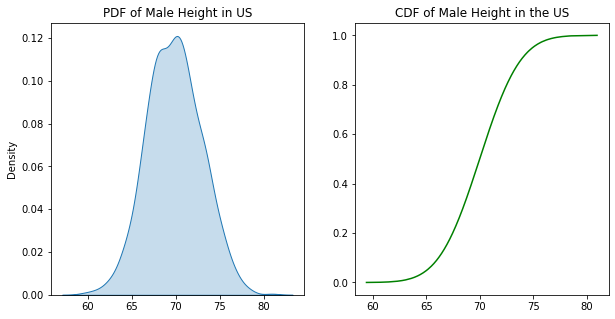

In [10]:
r = sorted(stats.norm.rvs(loc=70, scale=3, size=1000))
r_cdf = stats.norm.cdf(r, loc=70, scale=3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(r, ax=ax1, shade=True)
ax1.set_title('PDF of Male Height in US')

ax2.plot(r, r_cdf, color='g')
ax2.set_title('CDF of Male Height in the US');

If we provide `numpy` with the underlying parameters of our distribution, we can calculate:

In [11]:
# the probability that a value falls below a specified value

r = stats.norm(70, 3)
r.cdf(73)

0.8413447460685429

In [ ]:
# the probability that a value falls between two specified values

r = stats.norm(70, 3)
r.cdf(73) - r.cdf(67)

We can also calculate the value associated with a specfic percentile:

In [12]:
r.ppf(0.95)

74.93456088085442

## Common Discrete Distributions

### Bernoulli and Binomial Distributions

The Bernoulli Distribution is the discrete distribution that describes a two-outcome trial, such as a coin toss. The distribution is described by the probability $p$ of one random variable taking the value 1 and by the corrleative probability $q$, associated with 0 and taking the probability 1-p. 

PMF: 
${\displaystyle {\begin{cases}q=1-p&{\text{if }}k=0\\p&{\text{if }}k=1\end{cases}}}$

The simplest example is, once again, a coin flip.  In this scenario, we define either heads or tails as a "success", and assume, if the coin is fair, the probability of success to be .5

![](images/bernouli.png)

Another example would be a penalty kick in soccer.

Let's assume the probability of scoring a goal is .75. Then the Bernoulli Distribution is:

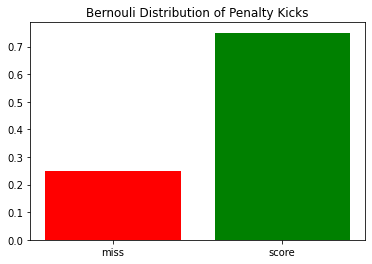

In [13]:
# probability of scoring
p = 0.75

# probability of missing
q = 1 - 0.75

fig, ax = plt.subplots()
ax.bar(['miss', 'score'],[q,p], color=['red','green'])
ax.set_title('Bernouli Distribution of Penalty Kicks');

The expected value is the probability of success, i.e. 0.75.

The variance is:  
$\sigma^2 = (0.75)*(1-0.75) = 0.1875 $

### Binomial Distribution

The Binomial distribution describes the number of successes of a set of Bernoulli trials. For example, say we have an unfair coin with a probability of landing heads of 0.8. If our number of trials is 3, our PMF and CDF would look like what we see below:

![](images/binomial.png)

For the binomial, our Expected Value and Variance can be calculated like so:
- Expected Value
> $E(X) = np$ <br>
- Variance
> $Var(X) = np(1-p)$<br>

If we want to see the probability of a certain number of successes, we use the pmf:<br/>
$\Large f(x) = {n \choose k}p^k(1 - p)^{n - k}$

Remember: ${n\choose k} = \frac{n!}{k!(n - k)!}$, the number of ways of choosing $k$ objects from a total of $n$.

In our penalty kick example. Suppose we consider a 10-kick set of penalty shots.

The Binomial Distribution can tell me what the probability is that the shootout will result in exactly $k$ goals out of $n$ shots ($k < n$).

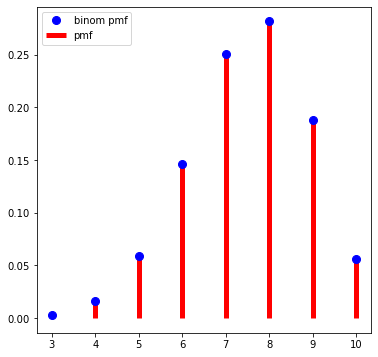

In [14]:
n = 10
p = 0.75
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.binom.ppf(0.001, n, p),
              stats.binom.ppf(0.999, n, p)+1)

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), 'r', linewidth=5,
          label='pmf')
ax.legend(loc='best');

### Poisson Distribution

The Poisson distribution describes the probability of a certain number of a specific type of event occuring over a given interval. We assume that these events are probabilistically independent.

Examples:

- number of visitors to a website over an hour
- number of pieces of mail arriving at your door per day over a month
- number of births in a hospital per day

Shape of the Poisson Distribution is governed by the rate parameter **$\lambda$** (lambda):

$\Large\lambda = \frac{Avg\ number\ of\ events}{period\ of\ time}$

Then our Poisson pmf is: ${\displaystyle P(k)= {\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$

Consider the scenario where a website receives 100 hits per hour.

Then we have:

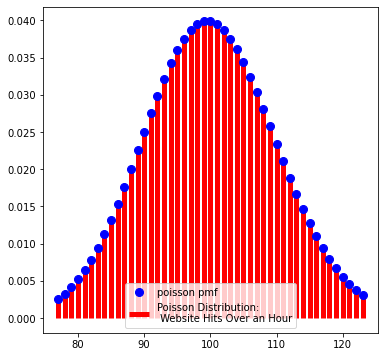

In [15]:
rate = 100

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.poisson.ppf(0.01, rate),
              stats.poisson.ppf(0.99, rate))

ax.plot(x, stats.poisson(rate).pmf(x), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson(rate).pmf(x), 'r', linewidth=5,
          label='Poisson Distribution:\n Website Hits Over an Hour')
ax.legend(loc='best');

The Poisson distribution has a unique characteristic:
    
$\Large\mu = \sigma^2 = \lambda$

In [ ]:
# The area under the curve up to the mean + 1sd
# would be 84% of the total area

stats.poisson.ppf(0.84, 100)

## Normal Distribution

The normal distribution describes many phenomena. Think of anything that has a typical range:
- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities
- IQ
- heart rate

Among human beings, 98.6 degrees Fahrenheit is an _average_ body temperature. Many folks' temperatures won't measure _exactly_ 98.6 degrees, but most measurements will be _close_. It is much more common to have a body temperature close to 98.6 (whether slightly more or slightly less) than it is to have a body temperature far from 98.6 (whether significantly more or significantly less). This is a hallmark of a normally distributed variable.

Similarly, there are large elephants and there are small elephants, but most elephants are near the average size.

The normal distribution is _very_ common in nature (**Why?**) and will arise often in your work. Get to know it well!

You will recognize it by its characteristic bell curve. 

![normal_curve](images/IQ_normal.png)

You may see the notation 

$N(\mu, \sigma^2)$

where N signifies that the distribution is normal, $\mu$ is the mean, and $\sigma^2$ is the variance.

The PDF of the normal curve is given by:

$\Large f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left[\frac{-(x - \mu)^2}{2\sigma^2}\right]$

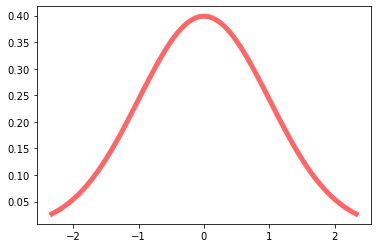

In [16]:
fig, ax = plt.subplots()

mu = 0
sigma = 1
z_curve = np.linspace(stats.norm(mu,sigma).ppf(0.01),
             stats.norm(mu,sigma).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mu,sigma).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve');

![](images/normal_2.png)

### Standard Normal Distribution

A standard normal distribution has a mean of 0 and variance of 1. This is also known as a z distribution. 


![norm_to_z](images/norm_to_z.png)

In [ ]:
# Let's transform the normal distribtion centered on 5
# with a standard deviation of 2 into a standard normal

normal_dist = np.random.normal(5, 2, 1000)
z_dist = [(x - np.mean(normal_dist))/np.std(normal_dist) 
          for x in normal_dist]

fig, ax = plt.subplots()
sns.kdeplot(z_dist, ax=ax);

![](images/empirical_rule.png)

### Empirical Rule

> The Empirical or 68–95–99.7 Rule states that 68% of the values of a normal distribution of data lie within 1 standard deviation of the mean, 95% within 2 stds, and 99.7 within three.  
> The empirical rule has many applications in data science.

### $z$-Score

A $z$-score for a data point x (in a normal distribution) is simply the distance to the mean in units of standard deviations. That is:

$z = \frac{x - \mu}{\sigma}$.

By calculating the z-score of an individual point, we can see how unlikely a value is.

**Exercises**:

1. Consider the distribution of heights of American women, with a mean of 65 inches and a standard deviation of 3.5 inches.

Calculate the z-score of a height of 75 inches.

2. What type of distribution would describe the following datasets?

    - (a) results of rolling a die 100 times;
    - (b) results of a random number generator;
    - (c) results of random measurements of palm tree heights

3. How would the salaries of New Yorkers likely be distributed?